In [18]:
import logomaker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
new_rc_params = {'text.usetex': False, 'svg.fonttype': 'none'}
plt.rcParams.update(new_rc_params)

# **Initial data**

The clone data was obtained from publicly available healthy tissues bulk RNA-seq data via MIXCR-based pipeline. The pipline and result tables are available in `MIXCR_healthy_tissues` directory.

All tables contain several columns:

- `id`: Sample identifier, an accession number from the NCBI Sequence Read Archive (SRA).
- `locus`: The immune receptor locus (e.g., IGH, TRB) to which the clonotype belongs.
- `cloneId`: Unique identifier for the clone within the sample.
- `readCount`: Number of reads assigned to the clonotype.
- `readFraction`: Fraction of all reads that this clonotype represents.
- `targetSequences`: Reconstructed nucleotide sequence(s) for the full target region.
- `targetQualities`: Corresponding base quality scores for `targetSequences`.
- `allVHitsWithScore`: List of V-gene hits with alignment scores.
- `allDHitsWithScore`: List of D-gene hits with alignment scores.
- `allJHitsWithScore`: List of J-gene hits with alignment scores.
- `allCHitsWithScore`: List of constant (C) region gene hits with alignment scores.
- `allVAlignments`: Detailed alignment information to V genes.
- `allDAlignments`: Detailed alignment information to D genes.
- `allJAlignments`: Detailed alignment information to J genes.
- `allCAlignments`: Detailed alignment information to constant region genes.
- `nSeqFR1`: Nucleotide sequence of framework region 1 (FR1).
- `minQualFR1`: Minimum base quality in FR1.
- `nSeqCDR1`: Nucleotide sequence of complementarity-determining region 1 (CDR1).
- `minQualCDR1`: Minimum base quality in CDR1.
- `nSeqFR2`: Nucleotide sequence of framework region 2 (FR2).
- `minQualFR2`: Minimum base quality in FR2.
- `nSeqCDR2`: Nucleotide sequence of complementarity-determining region 2 (CDR2).
- `minQualCDR2`: Minimum base quality in CDR2.
- `nSeqFR3`: Nucleotide sequence of framework region 3 (FR3).
- `minQualFR3`: Minimum base quality in FR3.
- `nSeqCDR3`: Nucleotide sequence of complementarity-determining region 3 (CDR3), key region for clonotype specificity.
- `minQualCDR3`: Minimum base quality in CDR3.
- `nSeqFR4`: Nucleotide sequence of framework region 4 (FR4).
- `minQualFR4`: Minimum base quality in FR4.
- `aaSeqFR1`: Amino acid translation of FR1.
- `aaSeqCDR1`: Amino acid translation of CDR1.
- `aaSeqFR2`: Amino acid translation of FR2.
- `aaSeqCDR2`: Amino acid translation of CDR2.
- `aaSeqFR3`: Amino acid translation of FR3.
- `aaSeqCDR3`: Amino acid translation of CDR3.
- `aaSeqFR4`: Amino acid translation of FR4.
- `refPoints`: Coordinates of important reference points (e.g., CDR boundaries) used for alignment and region extraction.


In [4]:
healthy_brain = pd.read_csv("../MIXCR_healthy_tissues/brain_clones.csv")
healthy_colon = pd.read_csv("../MIXCR_healthy_tissues/colon_clones.csv")
healthy_eye = pd.read_csv("../MIXCR_healthy_tissues/eye_clones.csv")
healthy_skin = pd.read_csv("../MIXCR_healthy_tissues/skin_clones.csv")

In [5]:
healthy_colon.head()

,id,locus,cloneId,readCount,readFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,...,nSeqFR4,minQualFR4,aaSeqFR1,aaSeqCDR1,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints
0,SRR5275305,TRA,2,2.0,0.500,GACTCAGCTGTCTACTTTTGTGCAGAGAATAAAGAGCGAGGTGCTA...,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[...,TRAV13-2,NaN,TRAJ32,...,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,CAENKERGATNKLIF,region_not_covered,:::::::::18:0:31:::::39:-11:63:::
1,SRR5275305,TRA,20,1.0,0.250,CACCTACCTCTGTGCCGTGAATCAAGGCAAATCAACCTTTGGGGAT...,B<FFFFIIIIBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBFFFFFF...,TRAV12-2,NaN,TRAJ27,...,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,CAVNQGKSTF,region_not_covered,:::::::::10:-2:21:::::24:-12:40:::
2,SRR5275305,TRA,29,1.0,0.250,CTTCTGCGCTGTGAGAGACCTCCTCAATGCCAGACTCATGTTTGGA...,IIIIBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBFFF...,TRAV1-1,NaN,TRAJ31,...,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,CAVRDLLNARLMF,region_not_covered,:::::::::4:4:22:::::24:-7:43:::
3,SRR5275303,TRB,248,2.0,0.250,ACTTCTGTGCCAGCAGTTTAGAGAACCACTACGAGCAGTACTTCGG...,Q[[O[HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH[[...,TRBV12-3,NaN,TRBJ2-7,...,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,CASSLENHYEQYF,region_not_covered,:::::::::5:-1:21:::::28:-3:44:::
4,SRR5275303,TRB,885,1.0,0.125,TTACTTCTGTGCCACCAGTGACACCCAAAGATCTGGGGCCAACGTC...,IFFFFII???????????????????????????????????????...,TRBV24-1,NaN,TRBJ2-6,...,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,region_not_covered,CATSDTQRSGANVLTF,region_not_covered,:::::::::7:-4:21:::::23:7:55:::


# **Data statistics**

A log-transformed plot of obtained loci.

In [7]:
data = {
    "Locus": ["IGH", "IGK", "IGL", "TRB", "TRA", "TRG", "TRD"],
    "Colon": [57229, 40855, 38013, 334, 240, 62, 8],
    "Skin": [3117, 2911, 1925, 1556, 1101, 67, 44],
    "Eye": [1602, 2199, 1210, 97, 80, 13, 1],
    "Brain": [48, 137, 73, 13, 14, 2, 0],
}
df = pd.DataFrame(data)
df.set_index("Locus", inplace=True)

tissues = ["Colon", "Skin", "Eye", "Brain"]
loci = df.index.tolist()

thresholds = {"Colon": 1000, "Skin": 1500, "Eye": 1000, "Brain": 50}

custom_colors = [
    "#66c2a5",
    "#fc8d62",
    "#8da0cb",
    "#e78ac3",
    "#a6d854",
    "#ffd92f",
    "#e5c494",
]

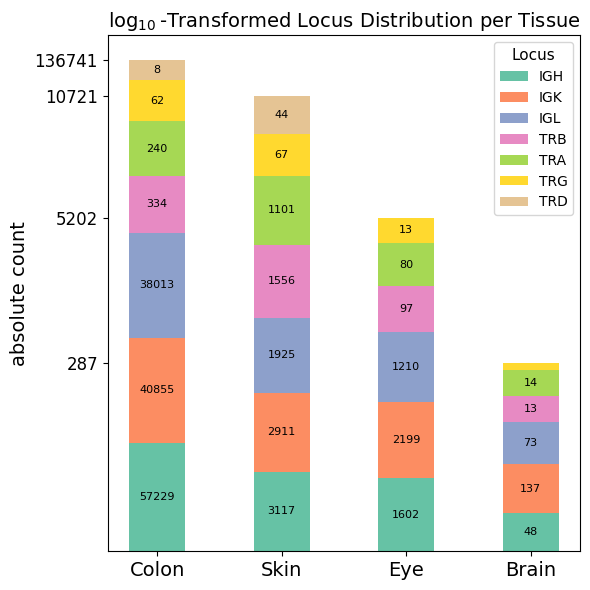

In [15]:
thresholds = {"Colon": 1, "Skin": 1, "Eye": 10, "Brain": 10}
df_replaced = df.replace(0, 1)
log_df = np.log10(df_replaced)

fig, ax = plt.subplots(figsize=(6, 6))
bar_width = 0.45
x = np.arange(len(tissues))
bottom = np.zeros(len(tissues))


def annotate_bars(ax, bottoms, log_vals, x_pos, abs_vals, tissue_names, threshold_dict):
    for i in range(len(abs_vals)):
        if abs_vals[i] >= threshold_dict[tissue_names[i]]:
            ax.text(
                x_pos[i],
                bottoms[i] + log_vals[i] / 2,
                f"{int(abs_vals[i])}",
                ha="center",
                va="center",
                fontsize=8,
            )


for i, locus in enumerate(loci):
    log_values = log_df.loc[locus, tissues].values
    abs_values = df.loc[locus, tissues].values
    ax.bar(x, log_values, bar_width, bottom=bottom, color=custom_colors[i], label=locus)
    annotate_bars(ax, bottom, log_values, x, abs_values, tissues, thresholds)
    bottom += log_values

log_sums = log_df.sum(axis=0)
abs_sums = df.sum(axis=0)
log_sums = log_df.sum(axis=0)
abs_sums = df.sum(axis=0)

custom_yticks = list(log_sums.values)
ax.set_yticks(custom_yticks)
ytick_labels = [f"{int(val)}" for val in abs_sums.values]
ax.set_yticklabels(ytick_labels, fontsize=12)

ax.set_xticks(x)
ax.set_xticklabels(tissues, fontsize=14)
ax.set_ylabel(r"absolute count", fontsize=14)
ax.set_title(r"$\log_{10}$-Transformed Locus Distribution per Tissue", fontsize=14)

legend = ax.legend(
    title="Locus",
    loc="upper right",
    fontsize=10,
    title_fontsize=11,
    frameon=True,
    facecolor="white",
    framealpha=0.8,
)

plt.tight_layout()
plt.savefig("../plots/healthy_tissues_locus_distribution_log_transformed.png", dpi=300)
plt.show()

# **Making logos**

In [22]:
def plot_cdr3_logos(df: pd.DataFrame, locus: str, top_n_lengths: int = 5) -> None:
    """
    Plot sequence logos for the top N most frequent CDR3 amino acid lengths for a given locus.

    Parameters:
        df (pd.DataFrame): DataFrame containing at least 'locus' and 'aaSeqCDR3' columns.
        locus (str): The receptor locus to filter on (e.g., 'IGK', 'TRA').
        top_n_lengths (int): Number of most common CDR3 lengths to plot (default: 5).
    """
    data_to_plot = df[df["locus"] == locus].copy()
    data_to_plot["cdr3_aa_length"] = data_to_plot["aaSeqCDR3"].str.len()
    lens_to_analyse = list(
        data_to_plot["cdr3_aa_length"].value_counts().head(top_n_lengths).index
    )
    data_to_plot = data_to_plot[data_to_plot["cdr3_aa_length"].isin(lens_to_analyse)]

    for length in lens_to_analyse:
        cdr3s = data_to_plot[data_to_plot["cdr3_aa_length"] == length]["aaSeqCDR3"]
        mat_df = logomaker.alignment_to_matrix(cdr3s)

        plt.figure(figsize=(10, 2))
        logomaker.Logo(mat_df, color_scheme="skylign_protein")
        plt.title(f"{locus} CDR3 logos (length = {length})")
        plt.ylabel("Counts")
        plt.xlabel("Position")
        plt.tight_layout()
        plt.show()

<Figure size 1000x200 with 0 Axes>

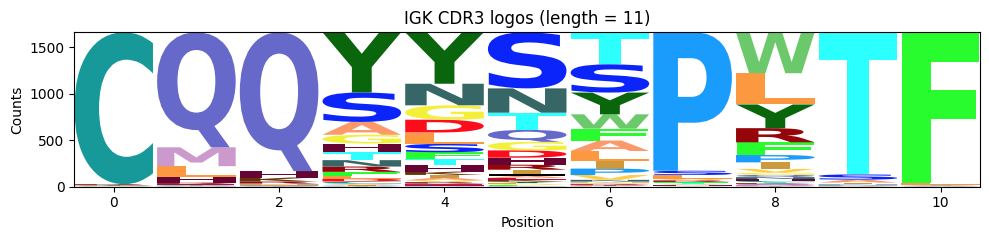

<Figure size 1000x200 with 0 Axes>

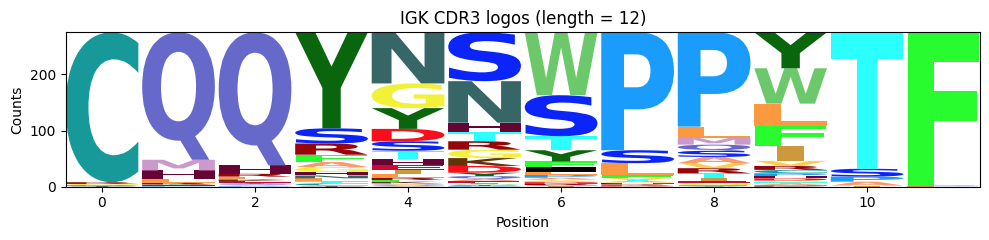

<Figure size 1000x200 with 0 Axes>

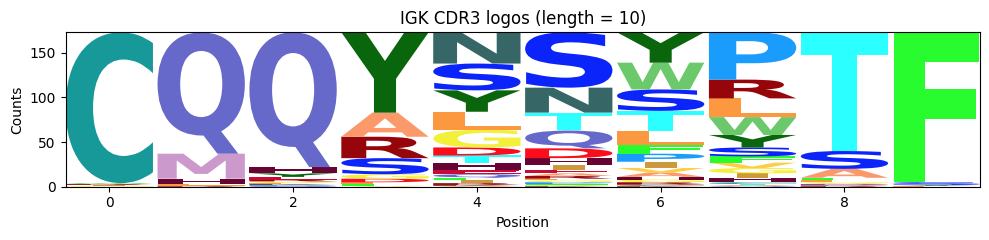

<Figure size 1000x200 with 0 Axes>

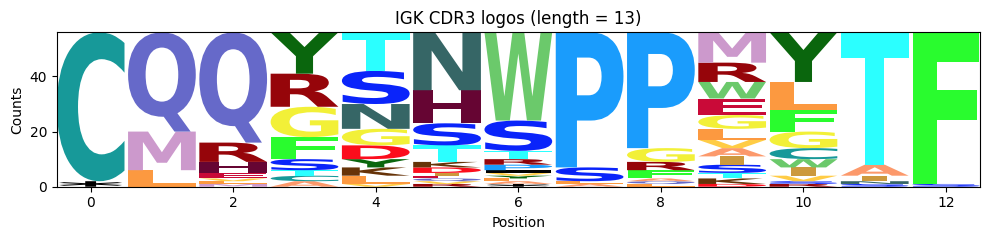

<Figure size 1000x200 with 0 Axes>

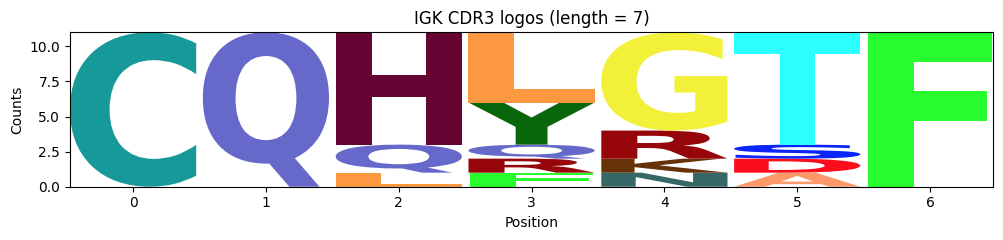

In [23]:
plot_cdr3_logos(healthy_eye, locus="IGK")

<Figure size 1000x200 with 0 Axes>

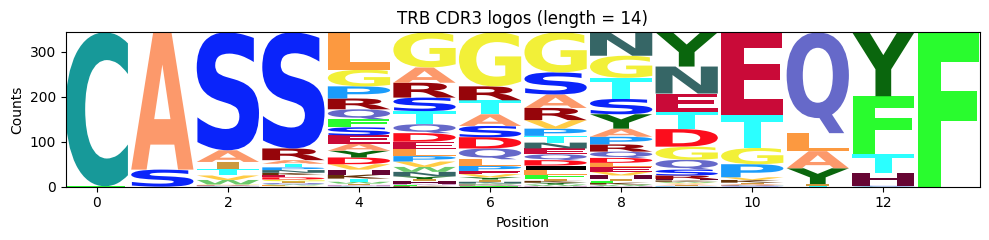

<Figure size 1000x200 with 0 Axes>

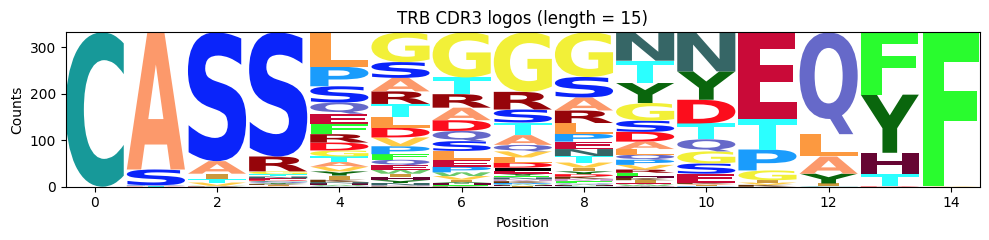

<Figure size 1000x200 with 0 Axes>

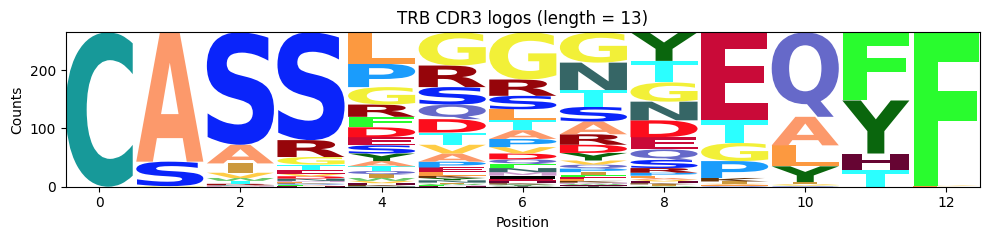

<Figure size 1000x200 with 0 Axes>

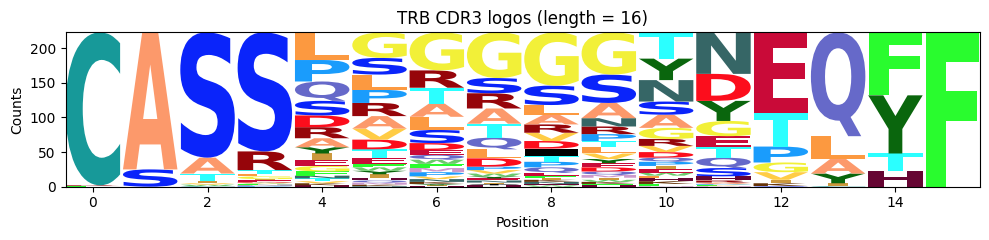

<Figure size 1000x200 with 0 Axes>

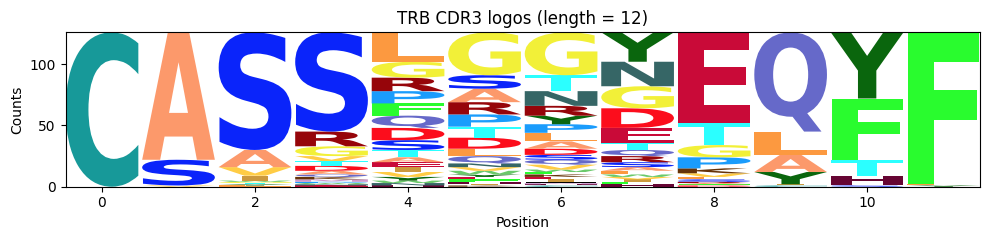

In [24]:
plot_cdr3_logos(healthy_skin, locus="TRB")

# **Making pivot tables**

Creation of tables similar to those for TCGA AIRR table

In [31]:
def process_repertoire_table(df):
    df = df.copy()
    df.rename(columns={"id": "sample"}, inplace=True)

    sample_coverage = df.groupby("sample")["readCount"].sum()

    def compute_normalized_table(df, column, sample_coverage):
        grouped = (
            df.groupby(["sample", column])["readCount"].sum().unstack(fill_value=0)
        )
        normalized = grouped.div(sample_coverage, axis=0)
        return normalized

    v_norm = compute_normalized_table(df, "allVHitsWithScore", sample_coverage)
    j_norm = compute_normalized_table(df, "allJHitsWithScore", sample_coverage)
    c_norm = compute_normalized_table(df, "allCHitsWithScore", sample_coverage)

    cvj_table = pd.concat([v_norm, j_norm, c_norm], axis=1).fillna(0)
    cvj_table.reset_index(inplace=True)

    cols_dict = {}
    for col in cvj_table.columns:
        if col in ["sample"]:
            continue
        prefix = col[:4]
        cols_dict.setdefault(prefix, []).append(col)

    iglv_df = cvj_table[["sample"] + cols_dict.get("IGLV", [])]
    igkv_df = cvj_table[["sample"] + cols_dict.get("IGKV", [])]
    ighv_df = cvj_table[["sample"] + cols_dict.get("IGHV", [])]

    tcr_v_df = cvj_table[
        ["sample"]
        + cols_dict.get("TRAV", [])
        + cols_dict.get("TRBV", [])
        + cols_dict.get("TRDV", [])
        + cols_dict.get("TRGV", [])
    ]

    tcr_j_df = cvj_table[
        ["sample"]
        + cols_dict.get("TRAJ", [])
        + cols_dict.get("TRBJ", [])
        + cols_dict.get("TRDJ", [])
        + cols_dict.get("TRGJ", [])
    ]

    grouped_igh = {}
    for isotype in ["IGHA", "IGHD", "IGHE", "IGHG", "IGHM"]:
        isotype_cols = [col for col in cvj_table.columns if col.startswith(isotype)]
        if isotype_cols:
            grouped_igh[isotype] = cvj_table[isotype_cols].sum(axis=1)

    igh_df_grouped = pd.DataFrame(grouped_igh)
    igh_df_grouped.insert(0, "sample", cvj_table["sample"])

    return {
        "cvj_table": cvj_table,
        "ighv_df": ighv_df,
        "igkv_df": igkv_df,
        "iglv_df": iglv_df,
        "tcr_v_df": tcr_v_df,
        "tcr_j_df": tcr_j_df,
        "igh_df_grouped": igh_df_grouped,
    }

In [32]:
tables_brain = process_repertoire_table(healthy_brain)
tables_eye = process_repertoire_table(healthy_eye)
tables_colon = process_repertoire_table(healthy_colon)
tables_skin = process_repertoire_table(healthy_skin)

In [38]:
tables_colon["ighv_df"].head()

,sample,IGHV1-17,IGHV1-18,IGHV1-2,IGHV1-24,IGHV1-3,IGHV1-45,IGHV1-46,IGHV1-58,IGHV1-67,...,IGHV4-61,IGHV4-80,IGHV5-10-1,IGHV5-51,IGHV5-78,IGHV6-1,IGHV7-34-1,IGHV7-4-1,IGHV7-56,IGHV7-81
0,SRR18748717,0.000091,0.027245,0.001824,0.001869,0.012562,0.000410,0.011969,0.000365,0.000365,...,0.003101,0.000000,0.002531,0.014295,0.000296,0.006908,0.000160,0.012927,0.000000,0.000182
1,SRR18748718,0.000017,0.017431,0.009548,0.001420,0.005281,0.000169,0.011973,0.000566,0.001141,...,0.004765,0.000017,0.000608,0.004842,0.000144,0.002704,0.000101,0.012649,0.000042,0.000135
2,SRR18748719,0.000000,0.021389,0.006062,0.002292,0.005380,0.000163,0.017228,0.001333,0.001170,...,0.003072,0.000000,0.000780,0.002942,0.000195,0.003494,0.000163,0.006843,0.000016,0.000146
3,SRR18748736,0.000026,0.009870,0.000606,0.001018,0.007944,0.000080,0.007098,0.000923,0.000474,...,0.003888,0.000018,0.002003,0.012438,0.000266,0.003527,0.000088,0.010038,0.000066,0.000212
4,SRR4420847,0.000000,0.000000,0.000000,0.000000,0.006042,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **Gene distributions**

In [43]:
def plot_top_genes_in_tissue(df, tissue, sort_by="median", top_n=30, transform="log1p"):
    df = df.copy()
    gene_cols = [col for col in df.columns if col not in ["sample"]]
    subset = df[gene_cols]
    if transform == "log1p":
        subset = np.log1p(subset * 1000)
    elif transform == "log10":
        subset = np.log10(subset * 1000 + 1)
    elif transform == "sqrt":
        subset = np.sqrt(subset * 1000)

    if sort_by == "median":
        scores = subset.median().sort_values(ascending=False)
    elif sort_by == "mean":
        scores = subset.mean().sort_values(ascending=False)
    elif sort_by == "entropy":
        scores = subset.apply(
            lambda x: entropy(np.histogram(x, bins=30, density=True)[0] + 1e-9)
        ).sort_values(ascending=False)
    elif sort_by == "nonzero":
        scores = (subset > 0).sum().sort_values(ascending=False)

    top_genes = scores.head(top_n).index.tolist()

    melted = subset[top_genes].melt(
        var_name="Gene", value_name="Transformed expression"
    )
    order = scores.head(top_n).index

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=melted,
        x="Gene",
        y="Transformed expression",
        order=order,
        palette="Spectral",
        cut=0,
        inner="box",
        linewidth=1,
    )
    plt.title(f"Top {top_n} genes in {tissue} (sorted by {sort_by})", fontsize=14)
    plt.xticks(rotation=80)
    plt.tight_layout()
    plt.show()

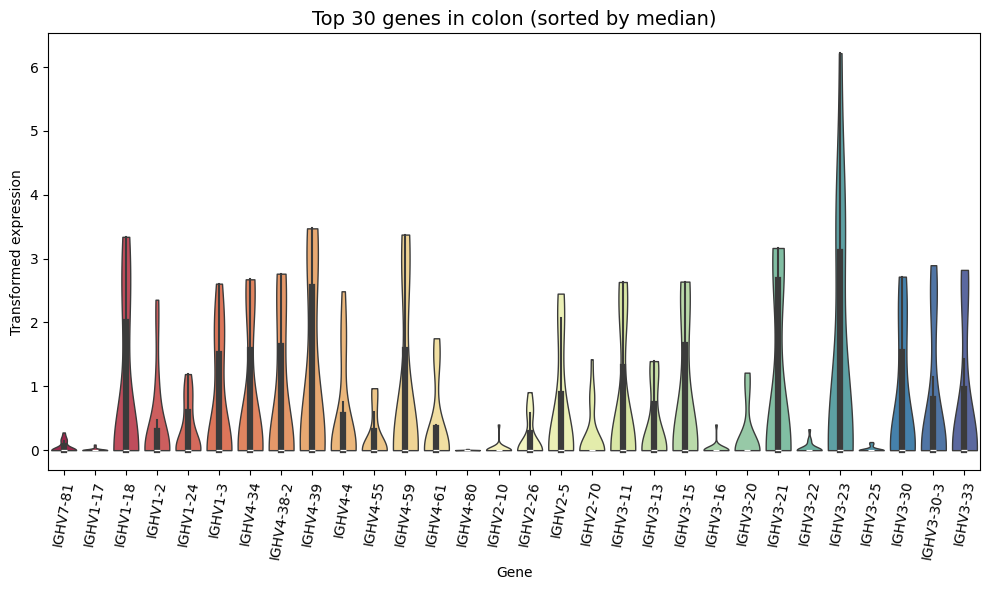

In [44]:
plot_top_genes_in_tissue(tables_colon["ighv_df"], "colon")

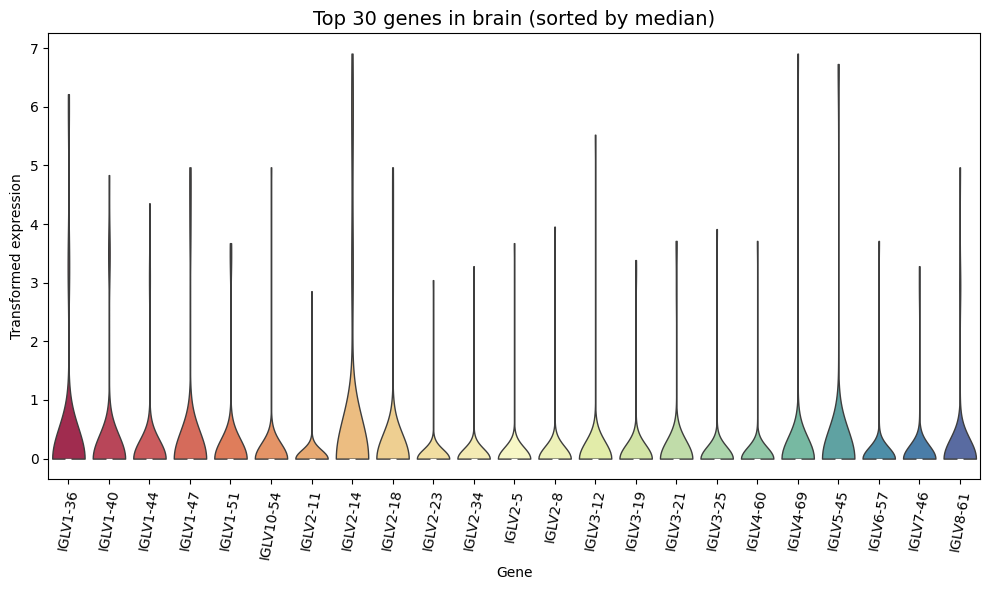

In [47]:
plot_top_genes_in_tissue(tables_brain["iglv_df"], "brain")

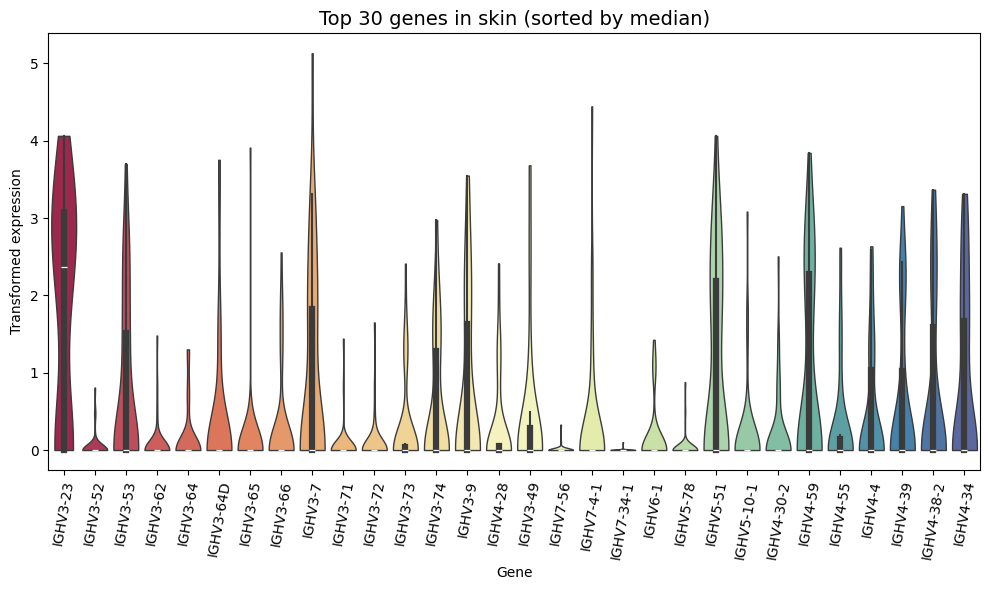

In [48]:
plot_top_genes_in_tissue(tables_skin["ighv_df"], "skin")